In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [2]:
# Carregar a base de dados

path = kagglehub.dataset_download("ashaychoudhary/indian-laptop-purchase-dataset-online-and-offline")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 35.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ashaychoudhary/indian-laptop-purchase-dataset-online-and-offline/versions/1


['laptop_purchase_data_india.csv']

In [3]:
path = '/root/.cache/kagglehub/datasets/ashaychoudhary/indian-laptop-purchase-dataset-online-and-offline/versions/1'
df = pd.read_csv(path + '/laptop_purchase_data_india.csv')

## Propriedades dos dados:

In [4]:
# Verificando as linhas iniciais do dataset
df.head()

,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating
0,CUST00001,56,Male,Pune,Low,Online,Dell,30K-50K,UPI,Rare,4
1,CUST00002,46,Female,Kolkata,Medium,Online,MSI,Below 30K,Cash,Occasional,2
2,CUST00003,32,Male,Bangalore,Low,Online,Samsung,80K-1.2L,UPI,Occasional,3
3,CUST00004,25,Female,Jaipur,Medium,Offline,Samsung,Below 30K,Credit Card,Rare,4
4,CUST00005,38,Female,Pune,High,Online,MSI,80K-1.2L,Cash,Rare,3


In [5]:
# Verificando todas as colunas com os tipos de dados e a quantidade de conteúdos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          5000 non-null   object
 1   Age                  5000 non-null   int64 
 2   Gender               5000 non-null   object
 3   City                 5000 non-null   object
 4   Income_Level         5000 non-null   object
 5   Purchase_Mode        5000 non-null   object
 6   Brand_Purchased      5000 non-null   object
 7   Price_Range          5000 non-null   object
 8   Payment_Mode         5000 non-null   object
 9   Purchase_Frequency   5000 non-null   object
 10  Satisfaction_Rating  5000 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [6]:
# Redundante, sabemos da linha anterior que não temos linha nula
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
City,0
Income_Level,0
Purchase_Mode,0
Brand_Purchased,0
Price_Range,0
Payment_Mode,0
Purchase_Frequency,0


## Explorando os dados:

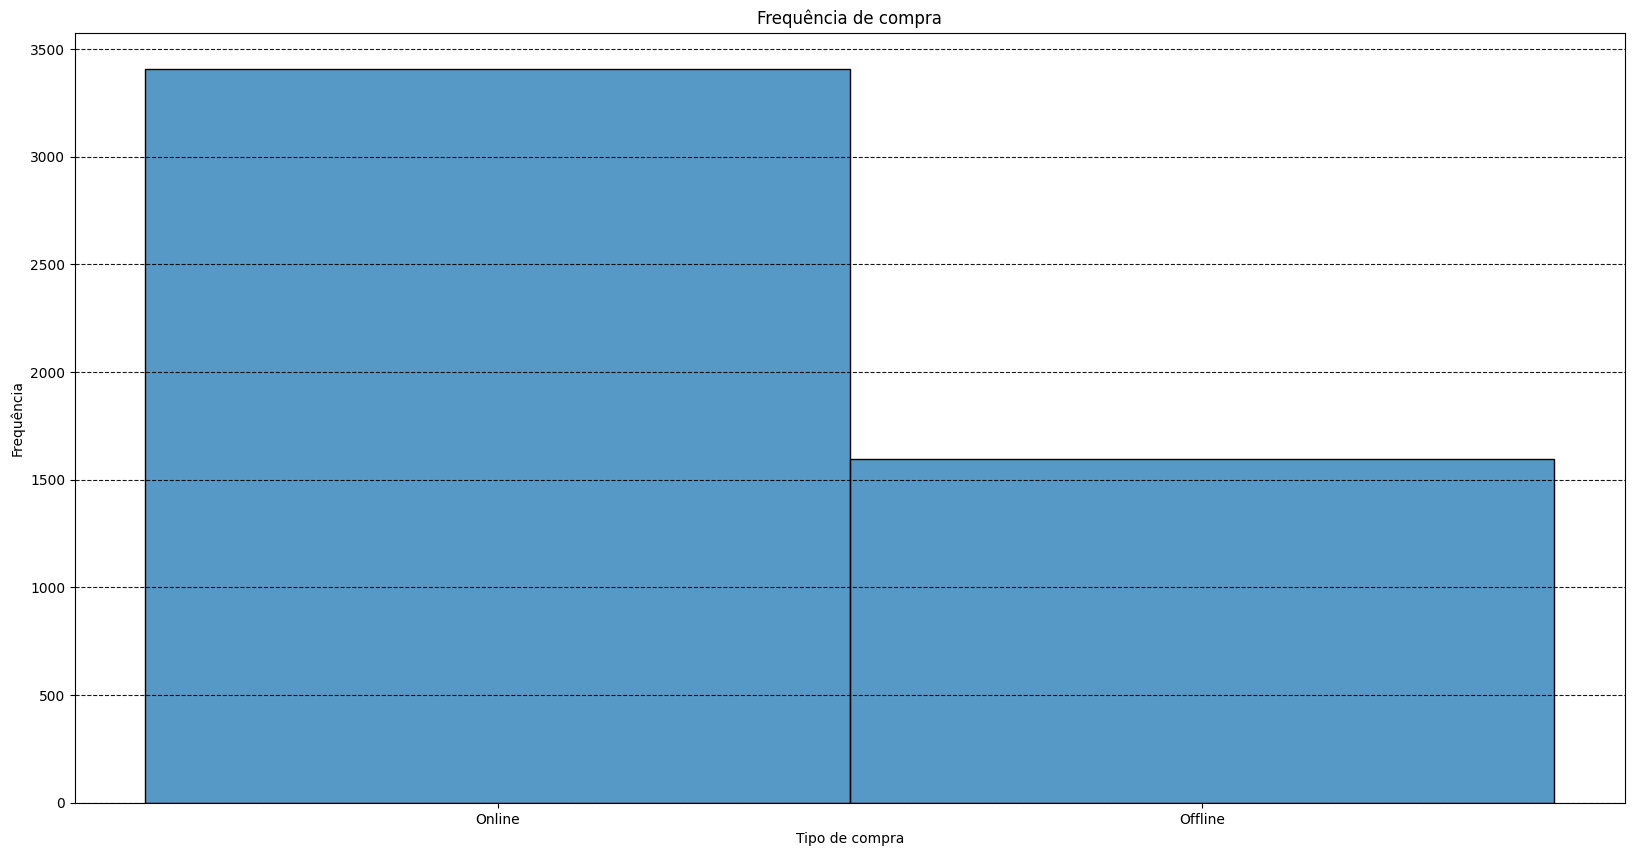

In [29]:
#Frequência de compras

plt.figure(figsize=(20, 10))
sns.histplot(df['Purchase_Mode'], bins=30)
plt.title('Frequência de compra')
plt.xlabel('Tipo de compra')
plt.ylabel('Frequência')
plt.grid(axis = 'y', linestyle='--', color = 'black', alpha=0.9)
plt.show()

In [43]:
tipo_de_compra = df['Purchase_Mode'].value_counts().reset_index(name='Count')
tipo_de_compra.columns = ['Purchase_Mode','Count']
tipo_de_compra

,Purchase_Mode,Count
0,Online,3405
1,Offline,1595


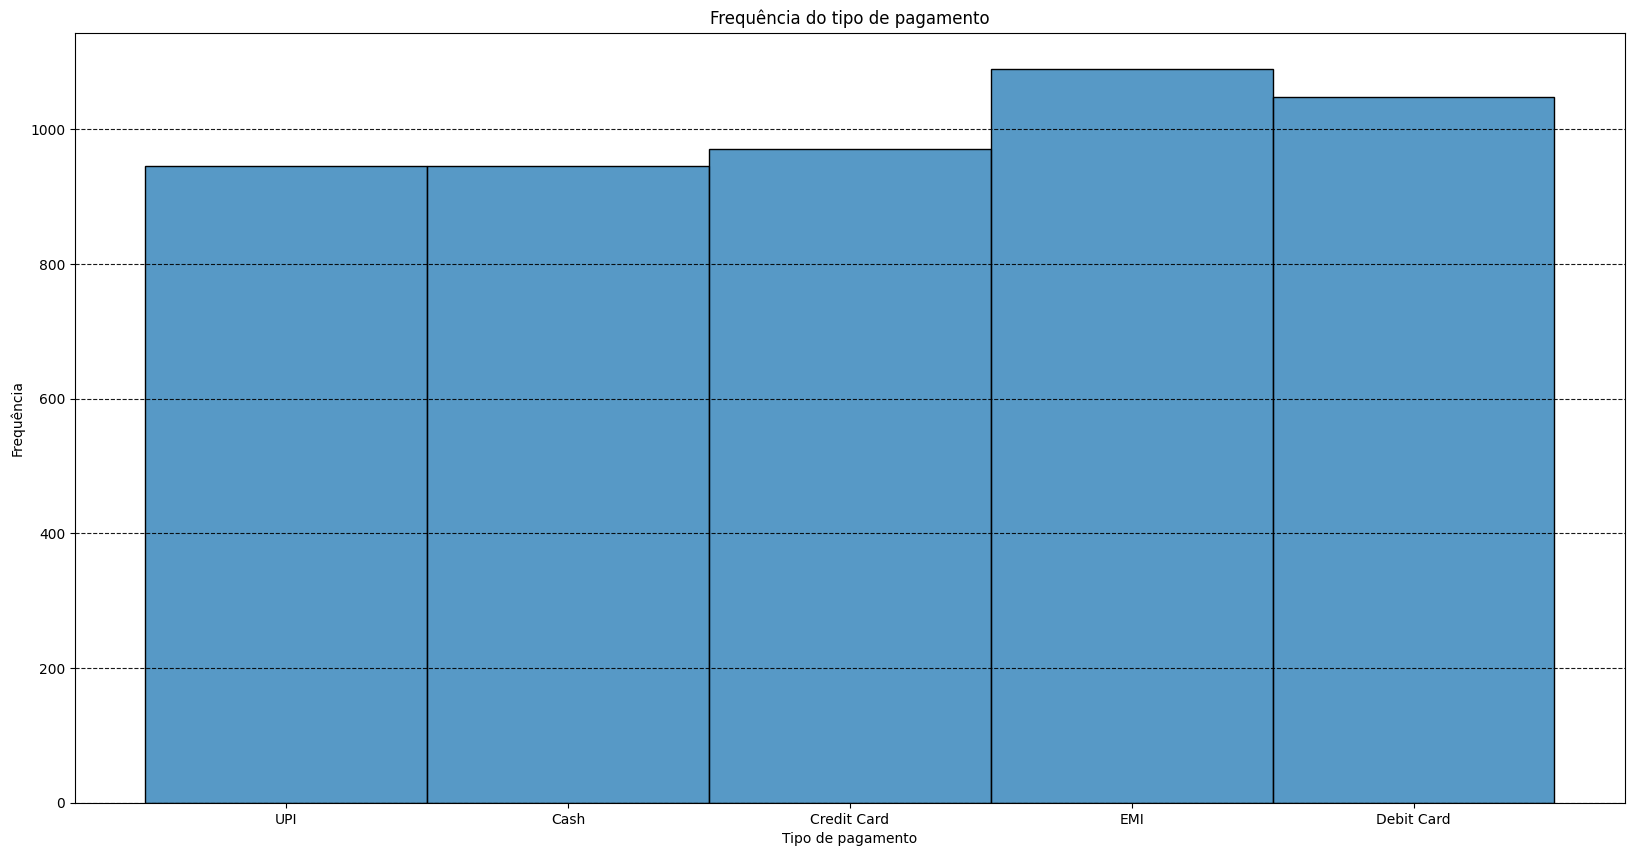

In [35]:
#Frequência do tipo de pagamento

plt.figure(figsize=(20, 10))
sns.histplot(df['Payment_Mode'], bins=30)
plt.title('Frequência do tipo de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Frequência')
plt.grid(axis = 'y', linestyle='--', color = 'black', alpha=0.9)
plt.show()

In [45]:
tipo_de_pagamento = df['Payment_Mode'].value_counts().reset_index(name='Count')
tipo_de_pagamento.columns = ['Payment_Mode', 'Count']
tipo_de_pagamento

,Payment_Mode,Count
0,EMI,1089
1,Debit Card,1048
2,Credit Card,971
3,UPI,946
4,Cash,946


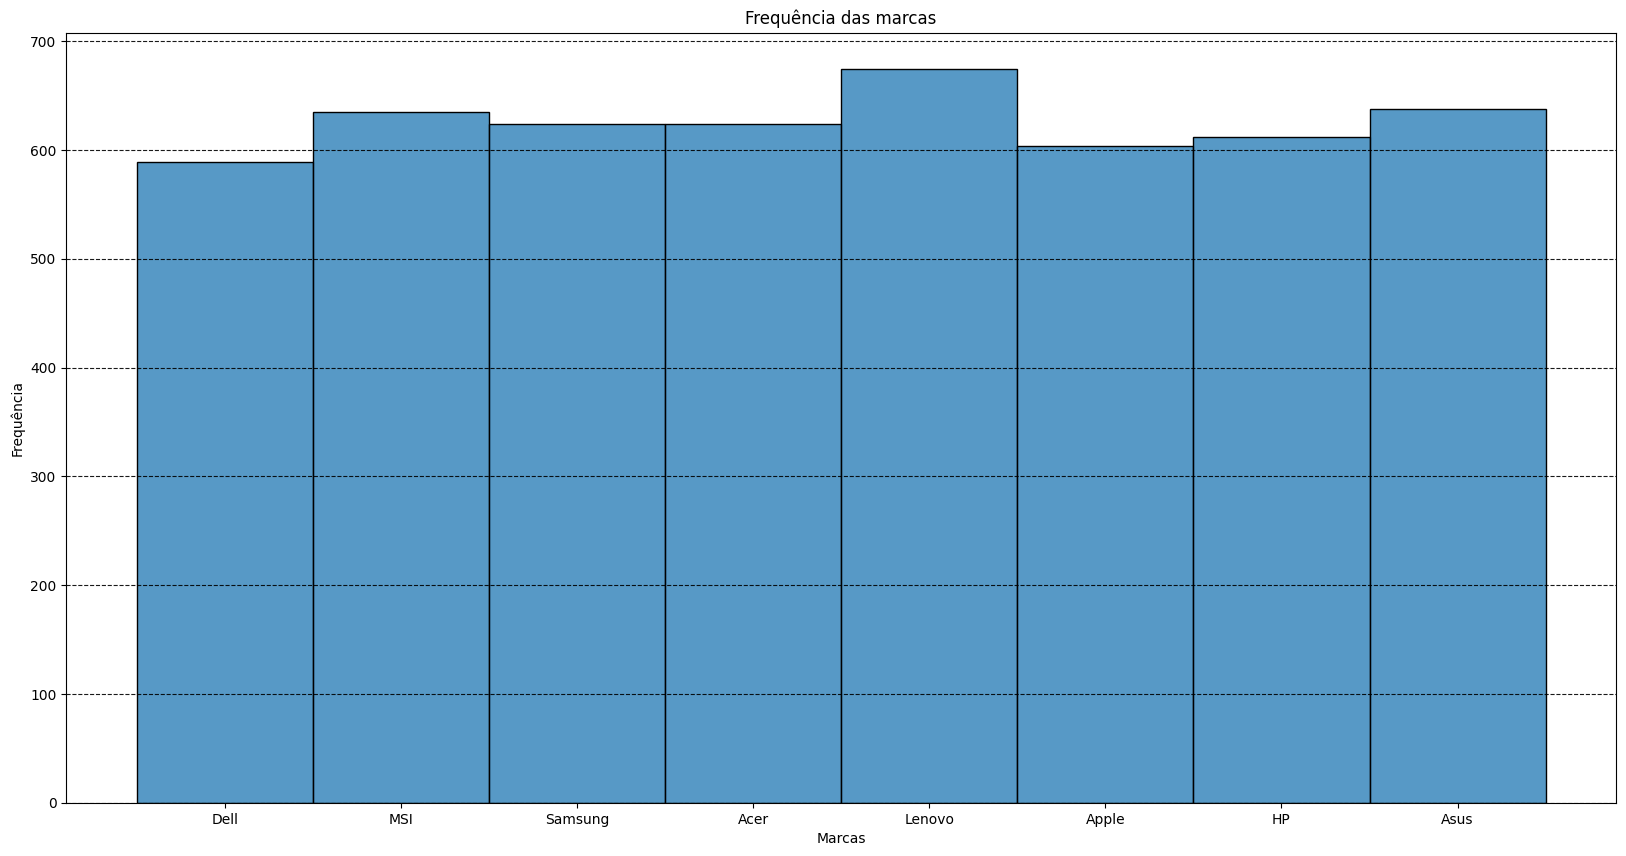

In [46]:
#Frequência das marcas compradas

plt.figure(figsize=(20, 10))
sns.histplot(df['Brand_Purchased'], bins=30)
plt.title('Frequência das marcas')
plt.xlabel('Marcas')
plt.ylabel('Frequência')
plt.grid(axis = 'y', linestyle='--', color = 'black', alpha=0.9)
plt.show()

In [47]:
tipo_de_pagamento = df['Brand_Purchased'].value_counts().reset_index(name='Count')
tipo_de_pagamento.columns = ['Brand_Purchased', 'Count']
tipo_de_pagamento

,Brand_Purchased,Count
0,Lenovo,674
1,Asus,638
2,MSI,635
3,Samsung,624
4,Acer,624
5,HP,612
6,Apple,604
7,Dell,589


**OBS**: Como a maior parte do dataset é composto por valores não númericos vamos usar o OneHotEnconder para transformar tudo em números e depois vamos explorar os dados

# OneHotEnconder

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
# Mapeando as colunas a serem convertidas

colunas_categoricas = ['Gender', 'City', 'Income_Level', 'Purchase_Mode',
                       'Brand_Purchased', 'Price_Range', 'Payment_Mode',
                       'Purchase_Frequency'
                       ]

In [54]:
# Chamando a função para fazer a conversão e guardando o nome da colunas

encoder = OneHotEncoder(drop='first', sparse_output=False)
colunas_convertidas = encoder.fit_transform(df[colunas_categoricas])
nomes_das_colunas_convertidas = encoder.get_feature_names_out(colunas_categoricas)
df_encoding = pd.DataFrame(colunas_convertidas, columns=nomes_das_colunas_convertidas)
print(df_encoding.head())

   Gender_Male  City_Bangalore  City_Chennai  City_Delhi  City_Hyderabad  \
0          1.0             0.0           0.0         0.0             0.0   
1          0.0             0.0           0.0         0.0             0.0   
2          1.0             1.0           0.0         0.0             0.0   
3          0.0             0.0           0.0         0.0             0.0   
4          0.0             0.0           0.0         0.0             0.0   

   City_Jaipur  City_Kolkata  City_Mumbai  City_Pune  Income_Level_Low  ...  \
0          0.0           0.0          0.0        1.0               1.0  ...   
1          0.0           1.0          0.0        0.0               0.0  ...   
2          0.0           0.0          0.0        0.0               1.0  ...   
3          1.0           0.0          0.0        0.0               0.0  ...   
4          0.0           0.0          0.0        1.0               0.0  ...   

   Price_Range_50K-80K  Price_Range_80K-1.2L  Price_Range_Above 1.2L

In [57]:
# Agora, para ver quais valores únicos em cada coluna foram convertidos para quais números:
for col in colunas_categoricas:
    print(f"Valores únicos da coluna '{col}':")
    valores_unicos = df[col].unique()  # Obtendo os valores únicos da coluna original
    print(valores_unicos)  # Exibindo os valores únicos

    # Pegando o mapeamento da codificação
    df_temp = pd.DataFrame({col: valores_unicos})


    for other_col in colunas_categoricas:
        if other_col != col:
            df_temp[other_col] = df[other_col].iloc[0]

    df_temp = df_temp[colunas_categoricas]

    encoding_map = encoder.transform(df_temp)  # Codificando os valores únicos
    print(f"Mapeamento para a coluna '{col}':")
    for value, encoded in zip(valores_unicos, encoding_map):
        print(f"  {value} -> {encoded}")
    print("\n")

Valores únicos da coluna 'Gender':
['Male' 'Female']
Mapeamento para a coluna 'Gender':
  Male -> [1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1.]
  Female -> [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1.]


Valores únicos da coluna 'City':
['Pune' 'Kolkata' 'Bangalore' 'Jaipur' 'Ahmedabad' 'Hyderabad' 'Delhi'
 'Mumbai' 'Chennai']
Mapeamento para a coluna 'City':
  Pune -> [1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1.]
  Kolkata -> [1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1.]
  Bangalore -> [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1.]
  Jaipur -> [1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1.]
  Ahmedabad -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1.]
  Hyderabad -> [1. 0. 0. 0. 1. 0. 0

# Modelos e sua eficiência:


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score, f1_score #
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from collections import Counter

In [105]:
# Seleção de variáveis
y = df['Satisfaction_Rating']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.4f}')


Acurácia do modelo: 0.1273


In [103]:
# Seleção de variáveis
y = df['Brand_Purchased']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.4f}')


Acurácia do modelo: 0.1273


In [91]:
# Aplicando SMOTE para balanceamento das classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinando o modelo com dados balanceados
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_resampled, y_resampled)

# Previsões
y_pred_rf = model_rf.predict(X_test)

# Avaliação
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia com SMOTE: {accuracy_rf_smote:.4f}')

Acurácia com SMOTE: 0.2100


In [97]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Previsões
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Acurácia do modelo XGBoost: {accuracy_xgb:.4f}')

Acurácia do modelo XGBoost: 0.1860
